# Heavy Traffic Indicators on the I-94 Motorway

In this analysis, we will look at a dataset containing traffic details on the I-94. A station located approximately midway between Minneapolis and Saint Paul records this information. The station only records westbound traffic. We want to find factors that increase the traffic. For example this could be weather, time of day or week, etc.  


In [1]:
import pandas as pd
import numpy as np

In [2]:
#read in file
traffic = pd.read_csv('/Users/yasmeenmahomedy2/Downloads/Datasets/Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Traffic Volume

The traffic volume coloumn tell us the numeric Hourly I-94 ATR 301 reported westbound traffic volume.



In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

<AxesSubplot:ylabel='Frequency'>

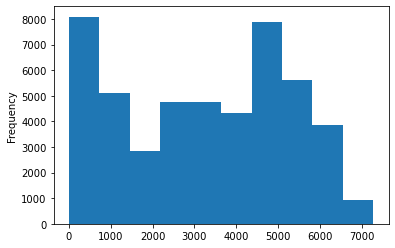

In [7]:
#plot histogram to check data
traffic['traffic_volume'].plot.hist() 

In [8]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Traffic volume varies from 0-7280 cars passing the station every hour. The average number of cars is 3620. 75% of the time there were 4933 cars passing the station. We need further analysis looking at daytime and nightime to make sense of these preliminary results.

## Daytime vs Nighttime

Daytime data: hours from 7 AM to 7 PM (12 hours). 

Nightime data: hours from 7 PM to 7 AM (12 hours)

In [9]:
#convert date_time object
traffic['date_time'] = pd.to_datetime(traffic['date_time']) 

In [10]:
traffic['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [11]:
#isolating daytime hours which are 7am to 7pm
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <19) ]

#isolating nighttime hours which are 7pm to 7am
night = traffic.copy()[(traffic['date_time'].dt.hour >=19) | (traffic['date_time'].dt.hour <7) ]

In [12]:
day.shape

(23877, 9)

In [13]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [14]:
night.shape

(24327, 9)

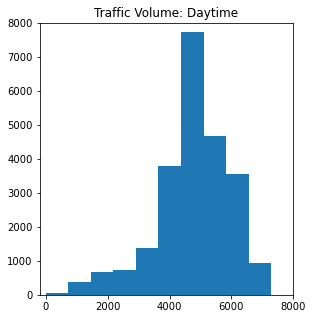

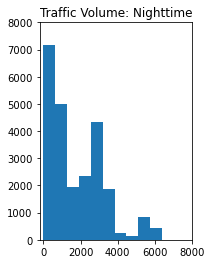

In [15]:
#plotting histogram of daytime traffic volume
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Daytime')
plt.ylim([0,8000])
plt.xlim([-200,8000])
plt.show()

#plotting histogram of nighttime traffic volume
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume: Nighttime')
plt.ylim([0,8000])
plt.xlim([-200,8000])
plt.show()

In [16]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [17]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the histograms the daytime data is left-skewed and a normal distribution with a mean of 4762. 

The nighttime data has a mean of 1785, however it doesn't follow a a clear normal distribution. It is also skewed to the right.

We can conclude there is more traffic in the daytime. To find factors that determine traffic, we will look at the daytime data more closely.

## Time

We will look at how traffic volume changes with time (month, day of week, time of day)

### By Month

In [18]:
#isolating day data by month
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

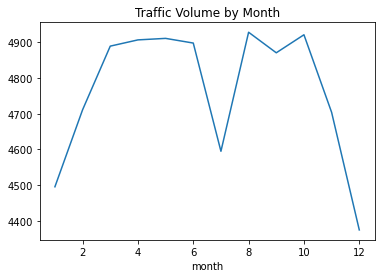

In [19]:
#line graph of traffic volume and month
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume by Month')
plt.show()

From the above graph, traffic volume is significantly lower during December, January, and July. A possible explanation for December and January could be the christmas holidays. In general it looks like traffic is lower in the cold winter months (November - February) and higher in summer. July looks like an odd exception, so we will analyse further.

### July Exploration

We check the traffic of July over the years:

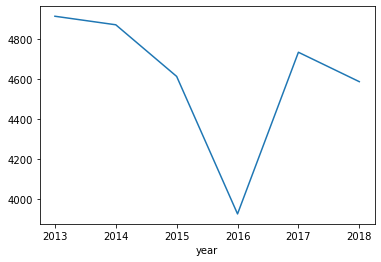

In [20]:
#isolate month of july
day['year'] = day['date_time'].dt.year
july_only = day[day['month'] == 7]
july_only = july_only.groupby('year').mean()
july_only['traffic_volume'].plot.line()
plt.show()

The traffic in July looks normal except for 2016. A possible explanation for this could be road construction, so less people were allowed to use the route. 

We can conclude that warm months have more traffic than cold ones.

### Day of the week

Note that 0 represents Monday, and 6 is Sunday.

In [21]:
#isolate day of the week from day data
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

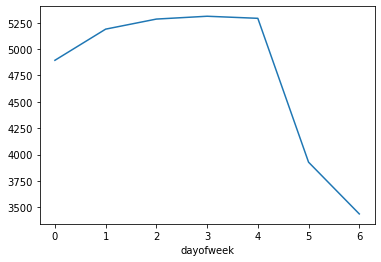

In [22]:
#line graph of traffic and day of the week
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic occurs mostly over working days (Monday-Friday), and is ligher over the weekends. Because the weekends are much less busy we will exclude them from our analysis.

### Time of Day

In [23]:
#isolating workdays and weekeends
day['hour'] = day['date_time'].dt.hour
work_day = day.copy()[day['dayofweek'] <= 4] # 4 is Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 is Saturday
by_hour_work = work_day.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_work['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


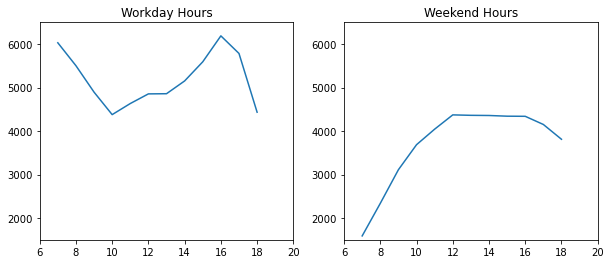

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(by_hour_work['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500, 6500)
plt.title('Workday Hours')


plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500, 6500)
plt.title('Weekend Hours')

plt.show()

Workday traffic volume is almost double that of the weekend. Rush hour (7 and 16) are a lot busier as expected, as people are commuting to and from work. On the weekend, midday is the busiest. 

To summarise:
* Summer months have more traffic than winter
* Weekdays are much busier than weekends
* Rush hour is the the peak of weekday traffic"

## Weather


In [25]:
#check correlation of columns with traffic volume
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature has the strongest correlation with traffic volume. The rain, snow and clouds re linked to weather as well, but have low correlations. The other columns have quite low correlations which seem insignificant.

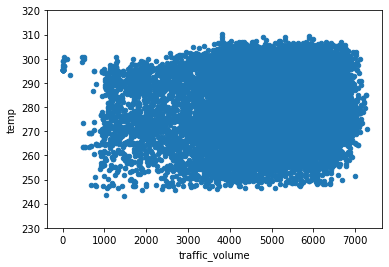

In [26]:
#scatter plot of temperature and traffic volume
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320)
plt.show()

Temperature has no clear relationship with traffic volume.

We will now look at the other weather related columns: weather main, and weather_description.

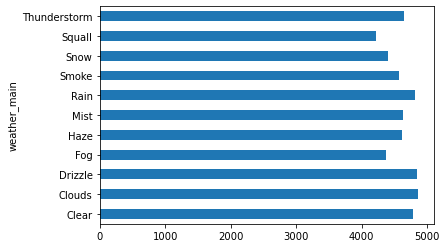

In [27]:
#horizontal bar graph
weather_main_group = day.groupby('weather_main').mean()
weather_main_group['traffic_volume'].plot.barh()
plt.show()

We can't draw any conclusions from this, as they are all quite similar in value.

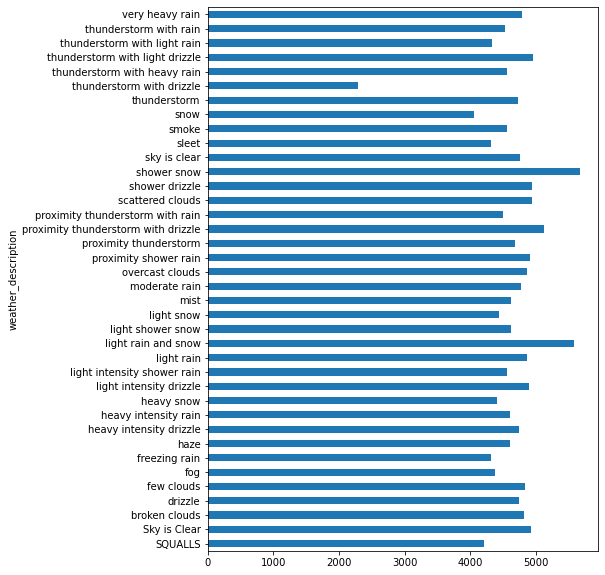

In [28]:
weather_descrip_group = day.groupby('weather_description').mean()
weather_descrip_group['traffic_volume'].plot.barh(figsize=(7,10))
plt.show()

Snow shower, light rain & snow, and proximity thunderstorm with drizzle seem to make traffic worse. A possible explanation is more people would choose cars over biking and walking when the weather is bad.

## Conclusion

We have found some factors that make traffic worse by looking at different indicators. 

Time indicators

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.


Weather indicators

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle